In [2]:
from base_dd import BDD_EVENTS, BDD_REGIONS, adresse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = BDD_EVENTS[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Sport', 'Medal']]
df.loc[df['Medal'].isna(), 'Medal'] = 0
df = df.drop(columns="Year")

df = df[df['Sport']=='Basketball']

df.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Sport', 'Medal'], dtype='object')

In [4]:
df['Sport'].unique()

array(['Basketball'], dtype=object)

In [23]:
df['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

I ANALAYSE UNIVARIE

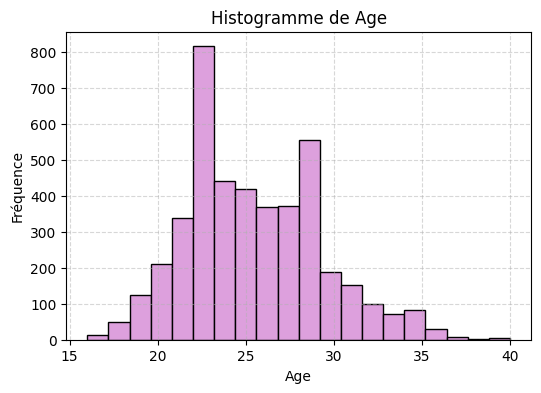

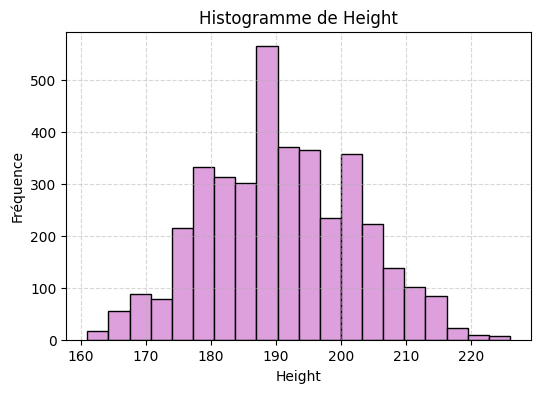

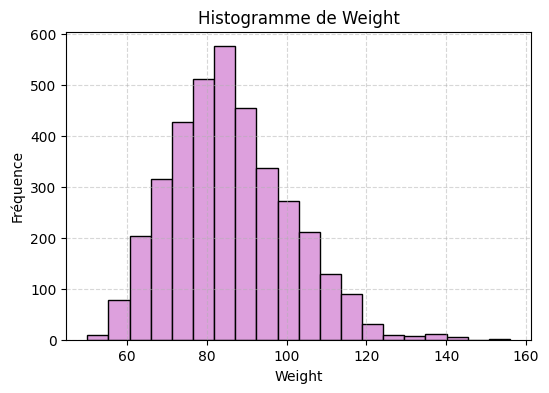

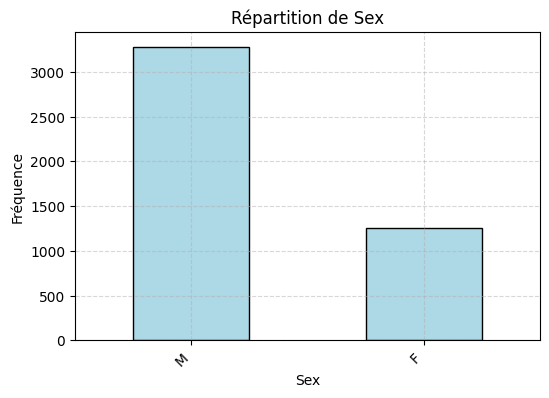

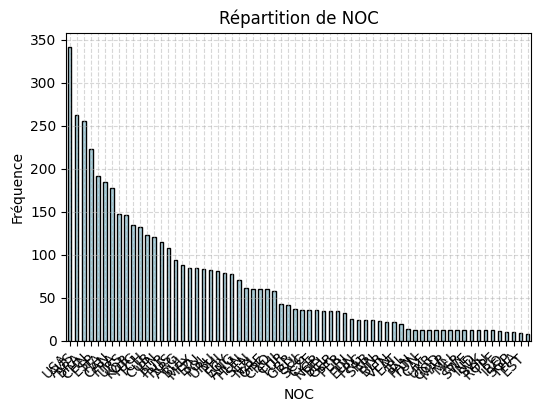

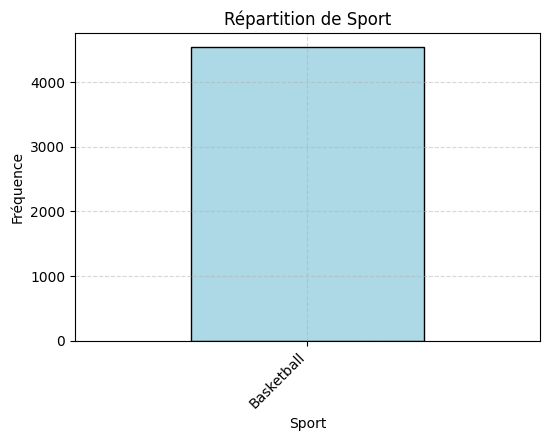

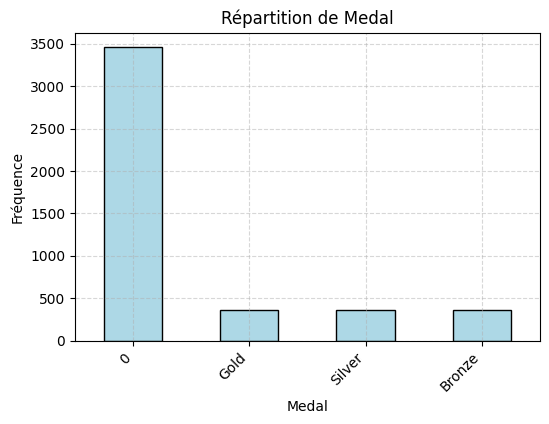

In [5]:
quant_vars = df.select_dtypes(include='number').columns
qual_vars = df.select_dtypes(exclude='number').columns

# Histogrammes pour les variables quantitatives
for col in quant_vars:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=20, color='plum', edgecolor='black')
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Histogrammes (ou bar plots) pour les variables qualitatives
for col in qual_vars:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title(f"Répartition de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [25]:
# Compter les occurrences de chaque valeur
# dans 'NOC' et trier par fréquence décroissante
noc_counts = df['NOC'].value_counts()
noc_counts

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
NBO        2
UNK        2
NFL        1
Name: count, Length: 230, dtype: int64

In [26]:
# Compter les occurrences de chaque valeur dans 'NOC'
# et trier par fréquence décroissante
sport_counts = df['Sport'].value_counts()
sport_counts

Sport
Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: count, Length: 66, dtype: int64

II.1 ANALYSE BIVA QUANTI QUALI

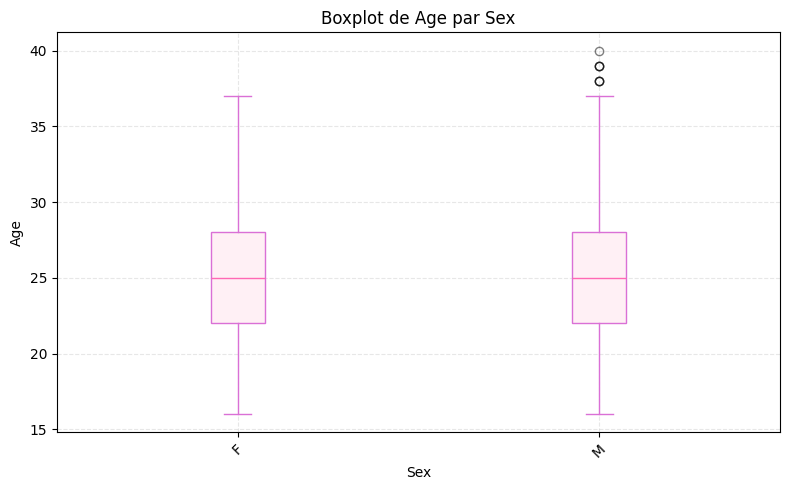

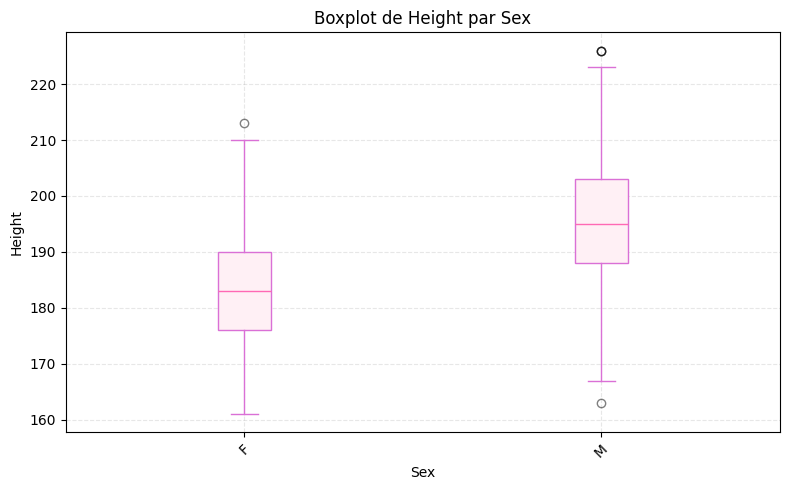

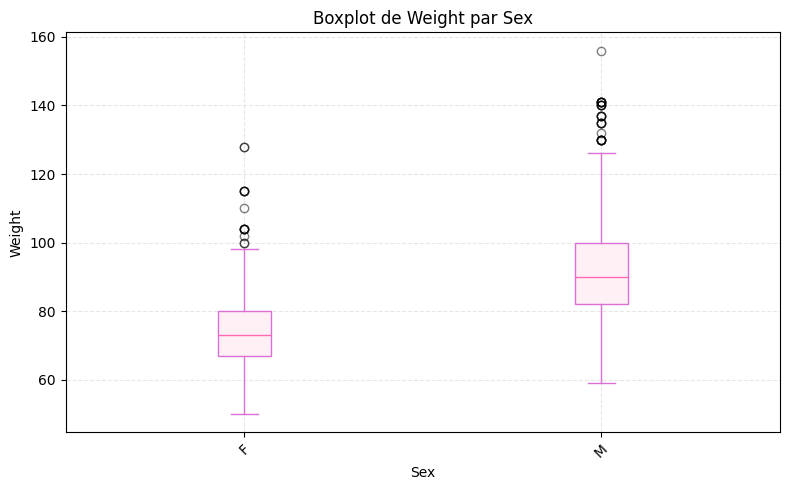

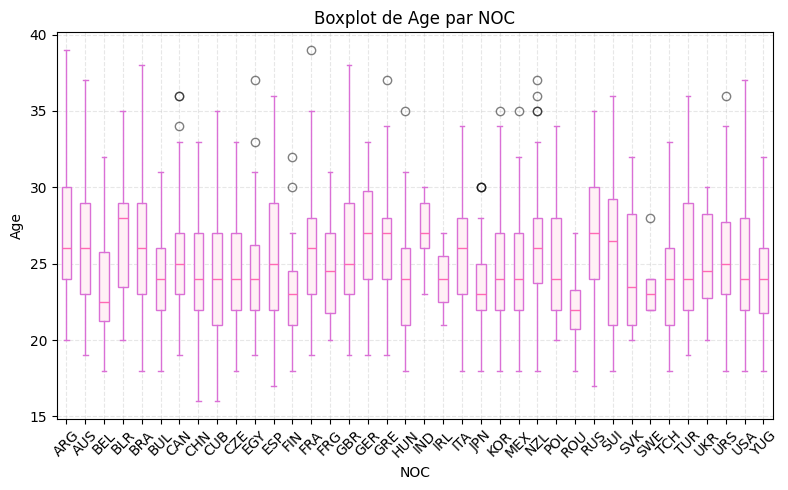

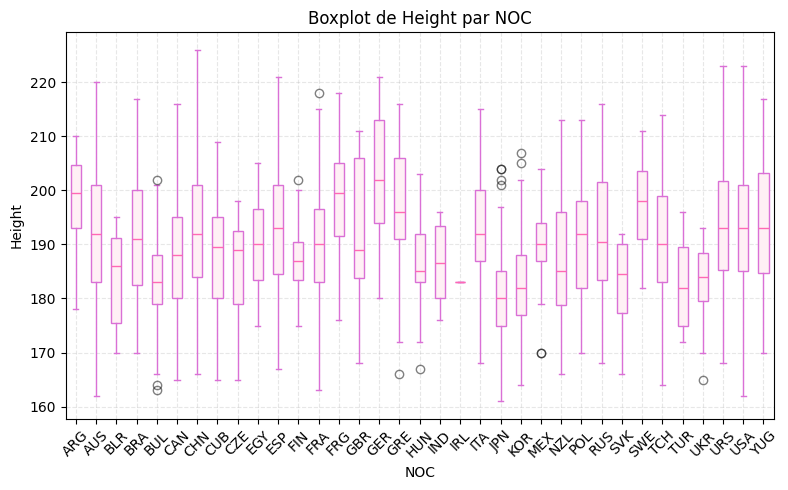

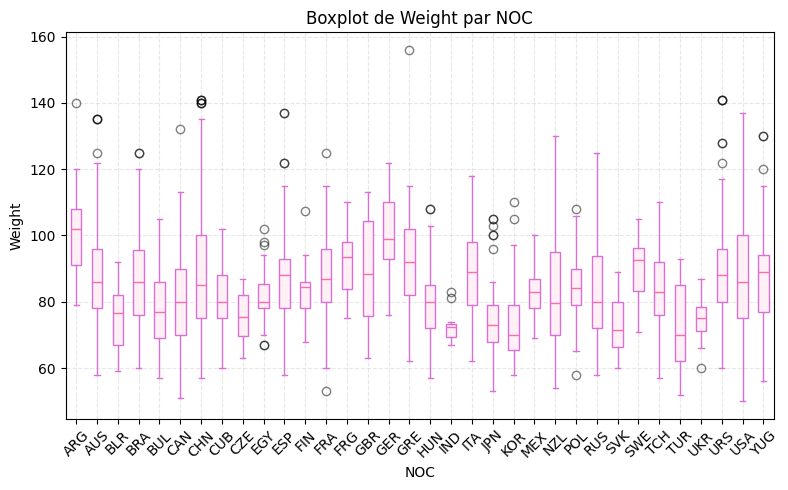

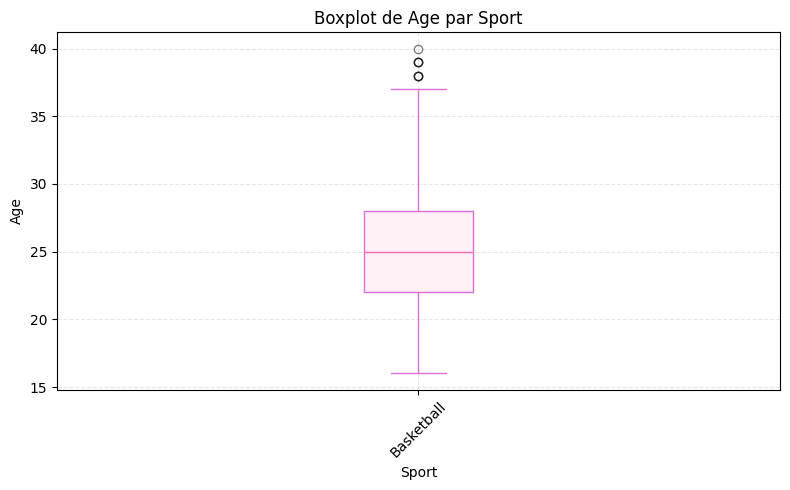

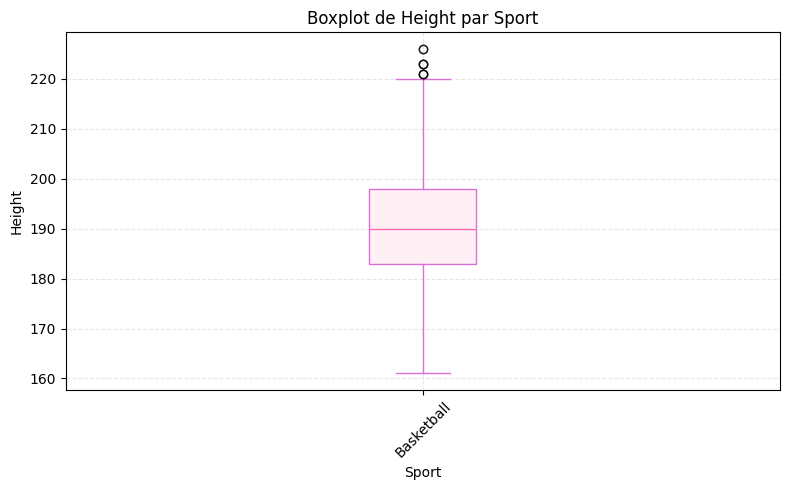

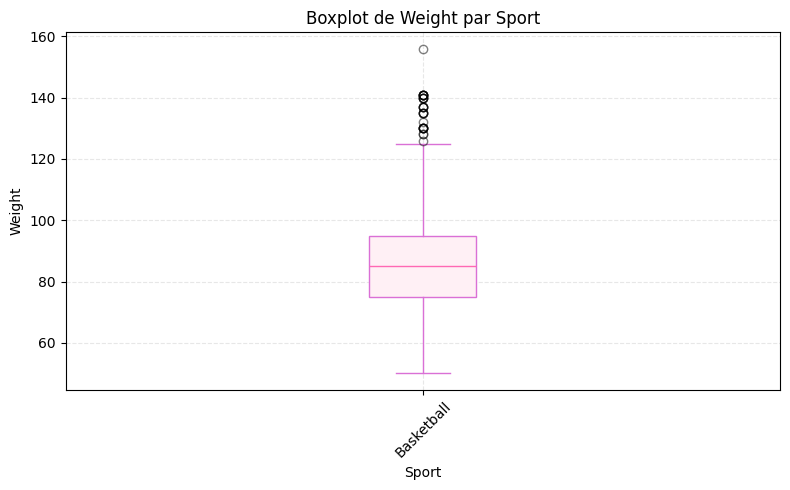

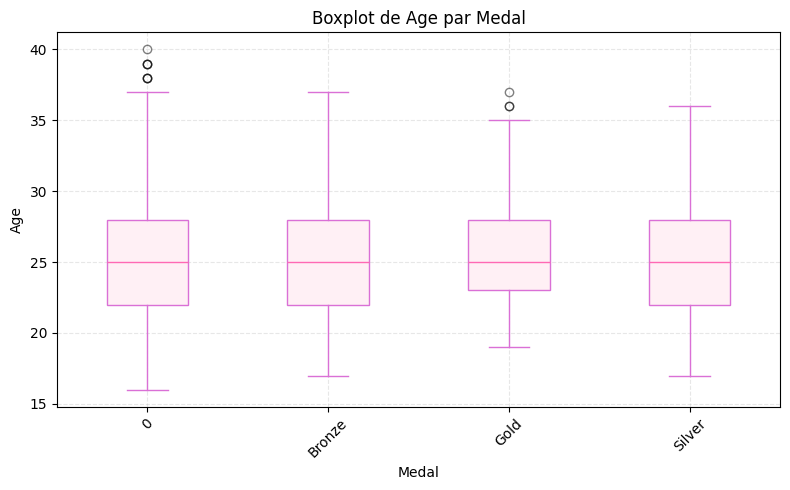

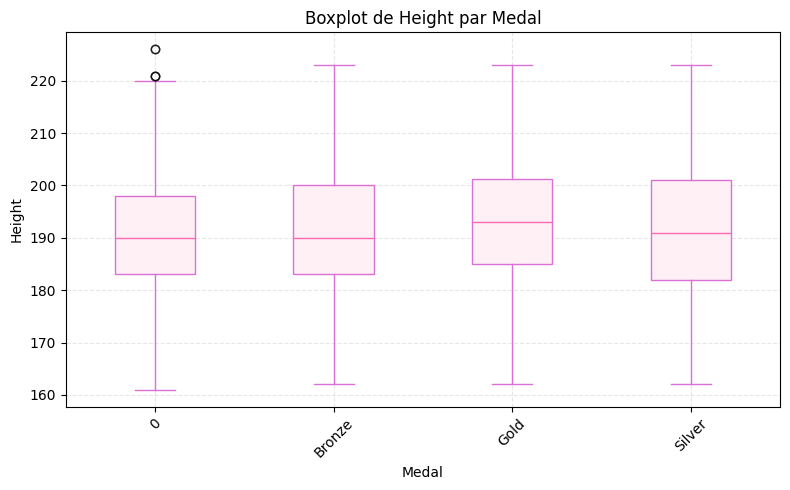

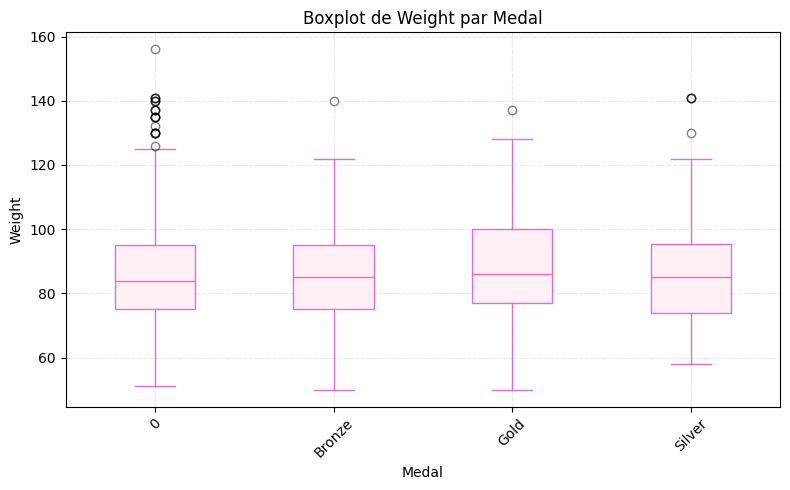

In [7]:
# Séparer les colonnes quantitatives et qualitatives
quant_vars = df.select_dtypes(include='number').columns
qual_vars = df.select_dtypes(exclude='number').columns

moda_NOC = [
    "USA", "FRA", "GBR", "ITA", "GER", "CAN", "JPN", "SWE", "AUS", "HUN",
    "POL", "SUI", "NED", "URS", "FIN", "ESP", "RUS", "CHN", "AUT", "NOR",
    "KOR", "ROU", "TCH", "BEL", "BRA", "DEN", "BUL", "FRG", "ARG", "GRE",
    "MEX", "GDR", "YUG", "UKR", "CUB", "NZL", "CZE", "BLR", "RSA", "EGY",
    "POR", "KAZ", "IND", "TUR", "IRL", "SLO", "TPE", "COL", "SVK"
]

moda_Sport = [
    'Athletics',
    'Gymnastics',
    'Swimming',
    'Shooting',
    'Cycling',
    'Fencing',
    'Rowing',
    'Cross Country Skiing',
    'Alpine Skiing',
    'Wrestling',
    'Football',
    'Sailing',
    'Equestrianism',
    'Boxing',
    'Speed Skating',
    'Ice Hockey',
    'Hockey',
    'Biathlon',
    'Basketball'
    ]

# Boucle sur chaque combo quali x quanti
for qual in qual_vars:
    for quant in quant_vars:
        if qual == 'NOC':
            dfa = df[df['NOC'].isin(moda_NOC)]
        elif qual == 'Sport':
            dfa = df[df['Sport'].isin(moda_Sport)]
        else:
            dfa=df.copy()
        dfb = dfa.loc[~(dfa[qual].isna())&~(dfa[quant].isna()), [qual, quant]]
        # Groupement des données
        groups = dfb.groupby(qual)[quant].apply(list)

        # Préparer les données pour le boxplot
        data = [group for group in groups]

        plt.figure(figsize=(8, 5))
        plt.boxplot(data, patch_artist=True,
                    boxprops=dict(facecolor='lavenderblush', color='orchid'),
                    medianprops=dict(color='hotpink'),
                    whiskerprops=dict(color='orchid'),
                    capprops=dict(color='orchid'),
                    flierprops=dict(marker='o', color='orchid', alpha=0.5))

        # Ajouter les labels trop mignons
        plt.xticks(ticks=range(1, len(groups)+1), labels=groups.index, rotation=45)
        plt.title(f"Boxplot de {quant} par {qual}")
        plt.ylabel(quant)
        plt.xlabel(qual)
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()

In [28]:
def eta_squared(df, var_X, var_Y):
    dfa = df.copy()
    dfa = df.loc[~(df[var_X].isna()) & ~(df[var_Y].isna()), [var_X, var_Y]]
    x, y = dfa[var_X], dfa[var_Y]
    categories = x.unique()
    y_mean = y.mean()
    y_vt = ((y - y_mean) ** 2).sum()
    ss_between = sum([
        len(y[x == cat]) * (y[x == cat].mean() - y_mean) ** 2
        for cat in categories
    ])
    return ss_between / y_vt

# Initialiser la matrice des rapports de corrélation
eta_matrix = np.zeros((len(qual_vars), len(quant_vars)))

# Calcul du rapport pour chaque paire
for i, qual in enumerate(qual_vars):
    for j, quanti in enumerate(quant_vars):
        eta_matrix[i, j] = eta_squared(df, qual, quanti)

# Affichage sous forme de tableau NumPy
print(pd.DataFrame(eta_matrix, index=qual_vars, columns=quant_vars))


            Age    Height    Weight
Sex    0.032157  0.238558  0.261563
NOC    0.032094  0.071600  0.053289
Sport  0.352615  0.291591  0.242760
Medal  0.000592  0.007749  0.007899


II.2 ANALYSE BIVA QUANTI QUANTI 

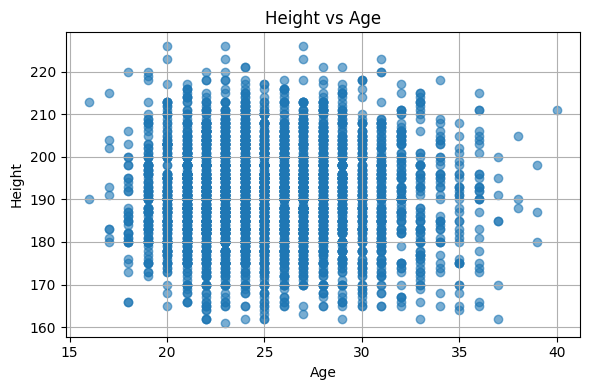

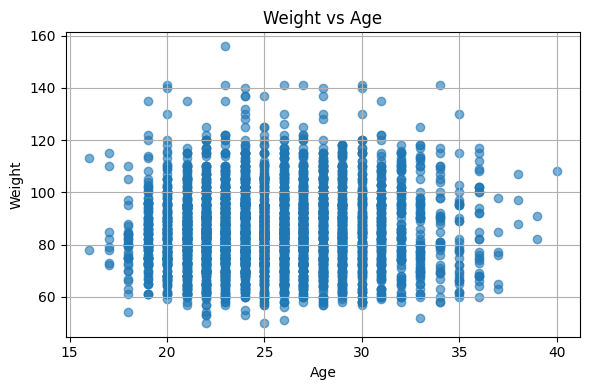

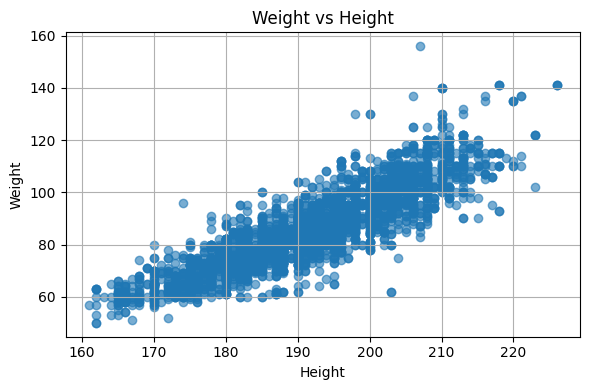

In [8]:
# Boucle manuelle sur toutes les paires sans doublons ni répétitions
for i in range(len(quant_vars)):
    for j in range(i + 1, len(quant_vars)):
        x_var = quant_vars[i]
        y_var = quant_vars[j]
        plt.figure(figsize=(6, 4))
        plt.scatter(df[x_var], df[y_var], alpha=0.6)
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.title(f"{y_var} vs {x_var}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [30]:
corr_matrix = df[quant_vars].corr(method="pearson")

# Affichage sous forme de tableau NumPy
print("Matrice de corrélation entre variables quantitatives :")
print(corr_matrix.round(3))

Matrice de corrélation entre variables quantitatives :
          Age  Height  Weight
Age     1.000   0.138   0.212
Height  0.138   1.000   0.796
Weight  0.212   0.796   1.000


II.3 ANALYSE BIVA QUALI QUALI 

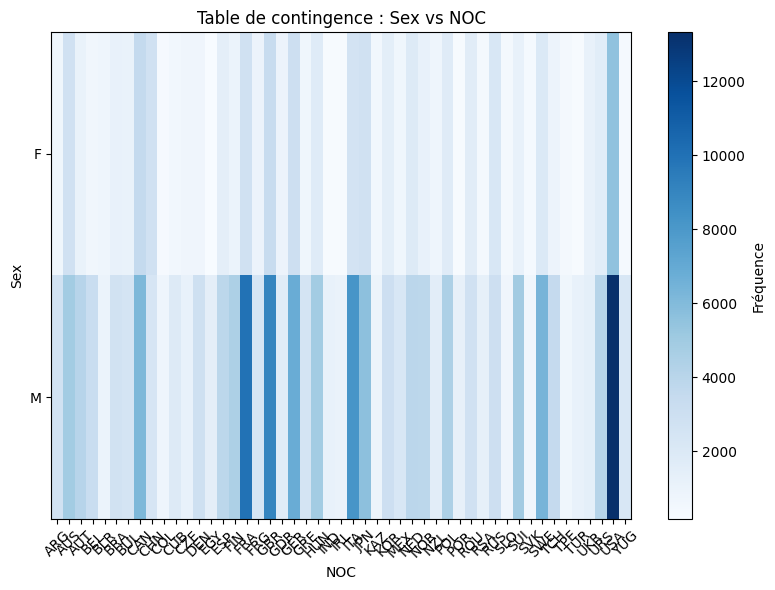

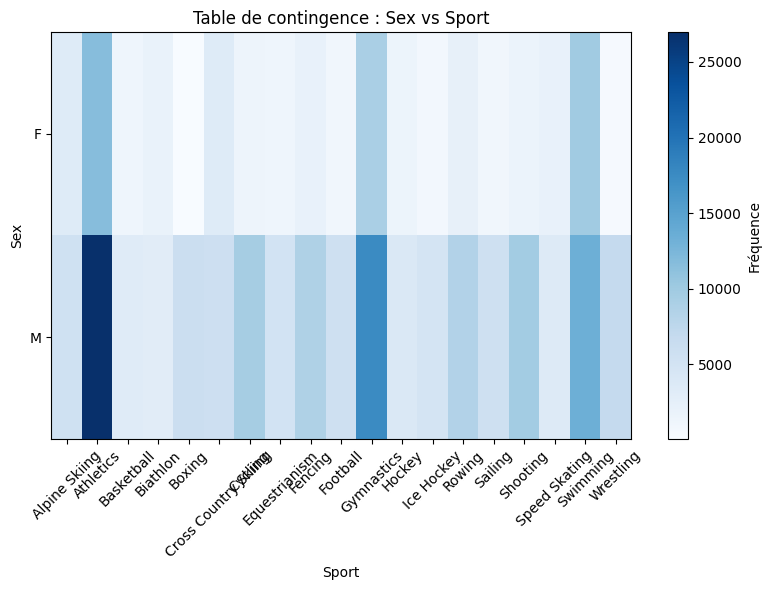

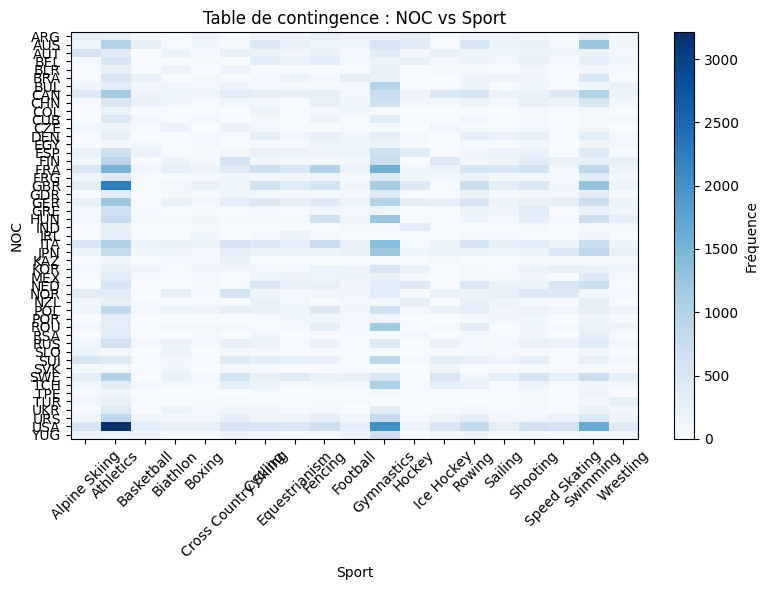

In [31]:
for i in range(len(quant_vars)):
    for j in range(i + 1, len(quant_vars)):

        var1 = qual_vars[i]
        var2 = qual_vars[j]

        dfa = df.copy()

        if var1 == 'NOC' or var2 == 'NOC':
            dfa = dfa[dfa['NOC'].isin(moda_NOC)]
        if var1 == 'Sport' or var2 == 'Sport':
            dfa = dfa[dfa['Sport'].isin(moda_Sport)]

        # Exemple avec deux variables qualitatives : var1 et var2
        contingency = pd.crosstab(dfa[var1], dfa[var2])

        plt.figure(figsize=(8, 6))
        plt.imshow(contingency, cmap="Blues", aspect="auto")
        plt.colorbar(label="Fréquence")
        plt.xticks(ticks=range(len(contingency.columns)), labels=contingency.columns,
                   rotation=45)
        plt.yticks(ticks=range(len(contingency.index)), labels=contingency.index)
        plt.title(f"Table de contingence : {var1} vs {var2}")
        plt.xlabel(var2)
        plt.ylabel(var1)
        plt.tight_layout()
        plt.show()

/var/folders/7s/qyqn_ltj7w78cvyl0_m_njzh0000gp/T/ipykernel_34426/1903252486.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


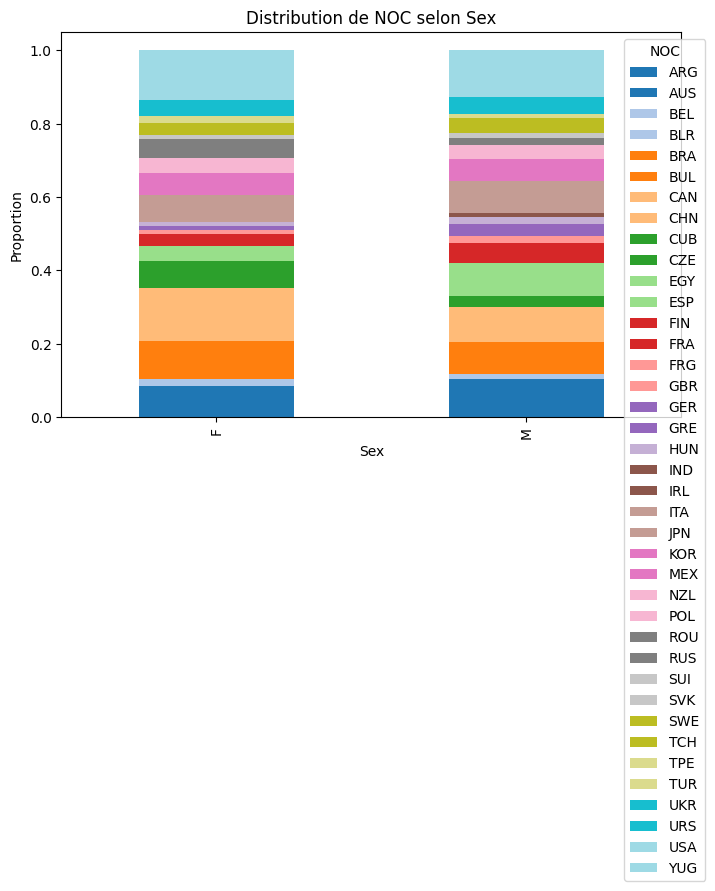

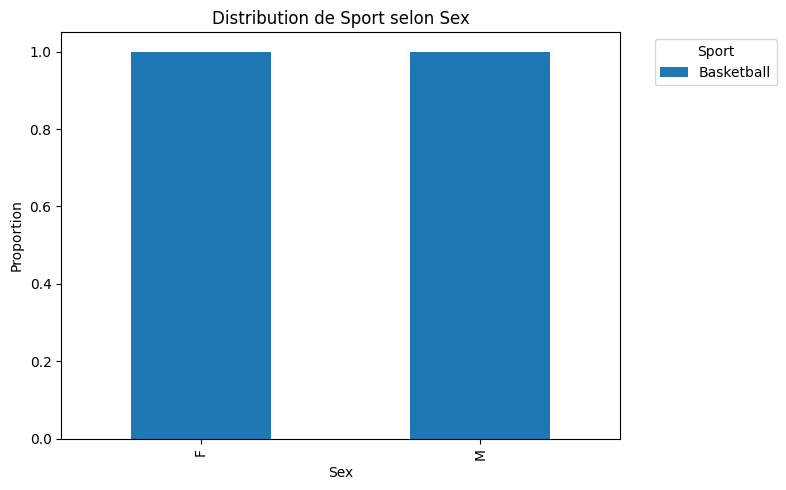

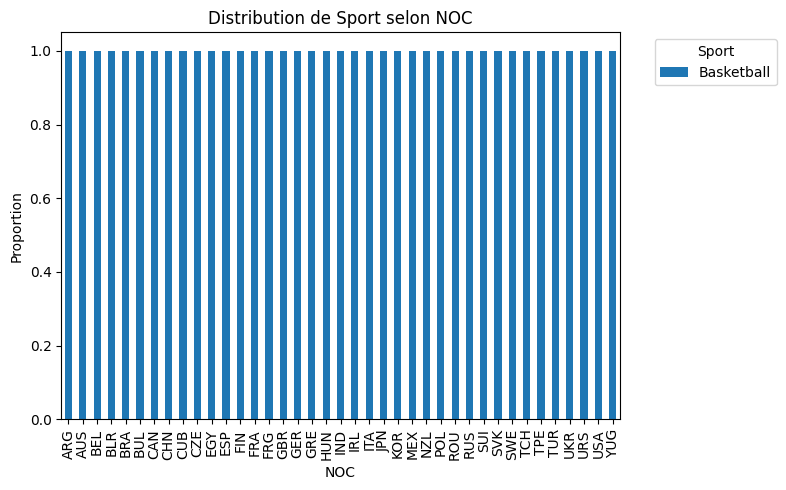

In [9]:
for i in range(len(quant_vars)):
    for j in range(i + 1, len(quant_vars)):

        var1 = qual_vars[i]
        var2 = qual_vars[j]

        dfa = df.copy()

        if var1 == 'NOC' or var2 == 'NOC':
            dfa = dfa[dfa['NOC'].isin(moda_NOC)]
        if var1 == 'Sport' or var2 == 'Sport':
            dfa = dfa[dfa['Sport'].isin(moda_Sport)]

        prop_table = pd.crosstab(dfa[var1], dfa[var2], normalize="index")

        prop_table.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="tab20")
        plt.title(f"Distribution de {var2} selon {var1}")
        plt.xlabel(var1)
        plt.ylabel("Proportion")
        plt.legend(title=var2, bbox_to_anchor=(1.05, 1))
        plt.tight_layout()
        plt.show()

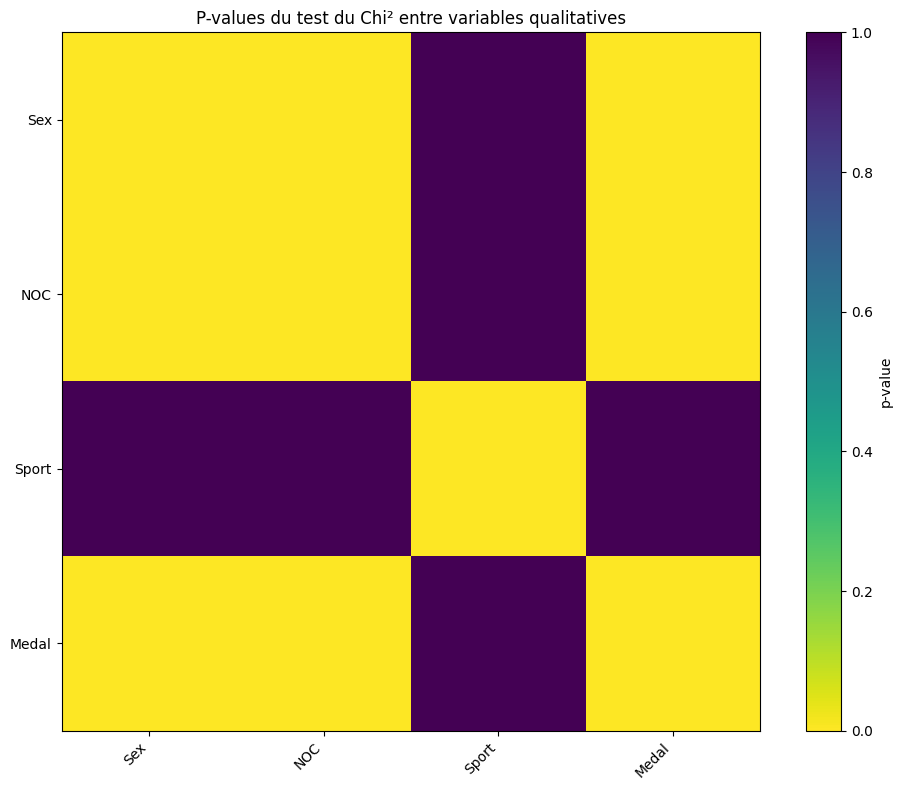

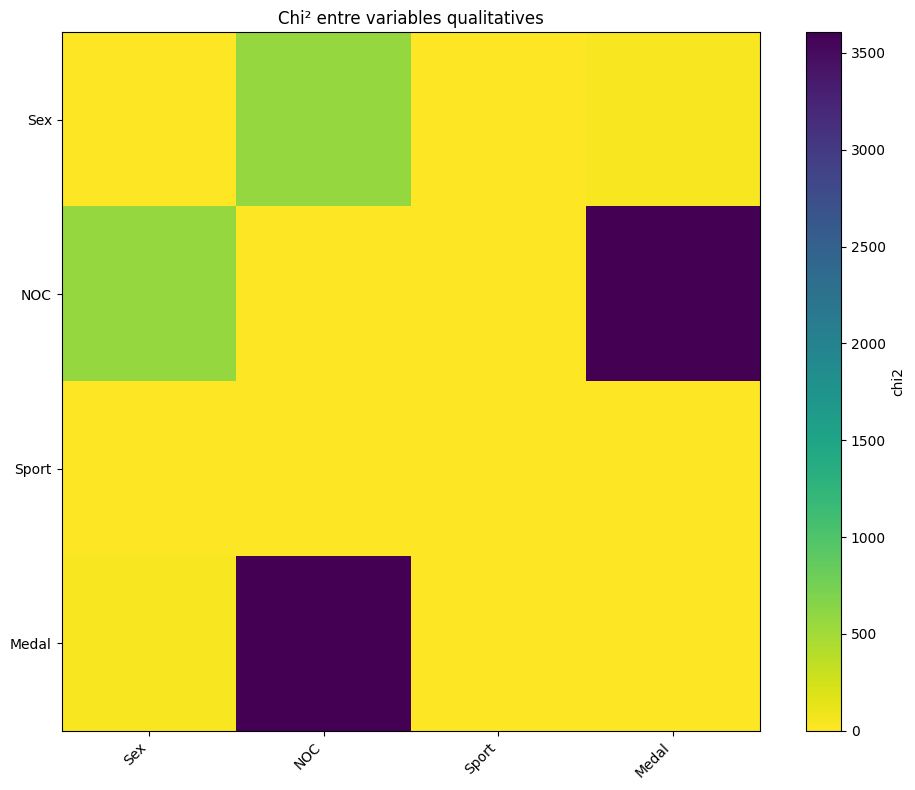

In [10]:
from scipy.stats import chi2_contingency


# Initialiser une DataFrame vide pour stocker les p-values
pval_matrix = pd.DataFrame(index=qual_vars, columns=qual_vars)
chi2_matrix = pd.DataFrame(index=qual_vars, columns=qual_vars)

# Boucler sur toutes les paires
for var1 in qual_vars:
    for var2 in qual_vars:


        if var1 == var2:
            pval_matrix.loc[var1, var2] = 0.0
            chi2_matrix.loc[var1, var2] = 0.0
        else:
            # Table de contingence
            contingency = pd.crosstab(dfa[var1], dfa[var2])
            try:
                chi2, p, dof, expected = chi2_contingency(contingency)
                pval_matrix.loc[var1, var2] = p
                chi2_matrix.loc[var1, var2] = chi2
            except:
                pval_matrix.loc[var1, var2] = None  # Erreur (souvent si une des var a trop peu de modalités)

# Convertir en float pour heatmap
pval_matrix = pval_matrix.astype(float)
chi2_matrix = chi2_matrix.astype(float)

# Affichage avec matplotlib
plt.figure(figsize=(10, 8))
im = plt.imshow(pval_matrix, cmap="viridis_r", interpolation="nearest")
plt.colorbar(im, label="p-value")

plt.xticks(range(len(pval_matrix.columns)), pval_matrix.columns, rotation=45, ha="right")
plt.yticks(range(len(pval_matrix.index)), pval_matrix.index)
plt.title("P-values du test du Chi² entre variables qualitatives")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
im = plt.imshow(chi2_matrix, cmap="viridis_r", interpolation="nearest")
plt.colorbar(im, label="chi2")

plt.xticks(range(len(chi2_matrix.columns)), chi2_matrix.columns, rotation=45, ha="right")
plt.yticks(range(len(chi2_matrix.index)), chi2_matrix.index)
plt.title("Chi² entre variables qualitatives")

plt.tight_layout()
plt.show()


In [11]:
def chi2(df, var_X, var_Y):
    dfa = df.loc[~(df[var_X].isna()) & ~(df[var_Y].isna()), [var_X, var_Y]]
    contingency = pd.crosstab(dfa[var_X], dfa[var_Y])
    n_X = np.array([])
    n_Y = np.array([])
    for y in contingency.columns:
            n_Y = np.append(n_Y, contingency[y].sum())
    for x in dfa[var_X].unique():
        n_x = 0
        for y in contingency.columns:
            n_x += contingency[y][x]
        n_X = np.append(n_X, n_x)
    n = n_X.sum()
    chi2 = 0
    for i_y, y in enumerate(contingency.columns):
        for i_x, x in enumerate(dfa[var_X].unique()):
            chi2 += (
                (contingency[y][x] - (n_X[i_x]*n_Y[i_y]/n))**2/
                (n_X[i_x]*n_Y[i_y]/n)
            )
    return chi2

def v_Cramer(df, v_chi2, var_X, var_Y):
    dfa = df.loc[~(df[var_X].isna()) & ~(df[var_Y].isna()), [var_X, var_Y]]
    n = dfa.shape[0]
    len_X = len(dfa[var_X].unique())
    len_Y = len(dfa[var_Y].unique())
    V_Cramer = np.sqrt(v_chi2/(n * min(len_X-1, len_Y-1)))
    return V_Cramer

chi2_matrix2 = pd.DataFrame(index=qual_vars, columns=qual_vars)
vc_matrix = pd.DataFrame(index=qual_vars, columns=qual_vars)

for x in qual_vars:
    for y in qual_vars:
        if not(pd.isna(chi2_matrix2.loc[x, y])):
            continue
        elif x==y:
            chi2_matrix2.loc[x, y] = 0.0
            vc_matrix.loc[x, y] = 1.0
        else:
            chi2_matrix2.loc[x, y] = chi2(df, x, y)
            vc_matrix.loc[x, y] = v_Cramer(df, chi2_matrix2.loc[x, y], x, y)
            chi2_matrix2.loc[y, x] = chi2_matrix2.loc[x, y]
            vc_matrix.loc[y, x] = vc_matrix.loc[x, y]

chi2_matrix2, vc_matrix


/var/folders/7s/qyqn_ltj7w78cvyl0_m_njzh0000gp/T/ipykernel_34426/3207732359.py:28: RuntimeWarning: invalid value encountered in scalar divide
  V_Cramer = np.sqrt(v_chi2/(n * min(len_X-1, len_Y-1)))
/var/folders/7s/qyqn_ltj7w78cvyl0_m_njzh0000gp/T/ipykernel_34426/3207732359.py:28: RuntimeWarning: invalid value encountered in scalar divide
  V_Cramer = np.sqrt(v_chi2/(n * min(len_X-1, len_Y-1)))
/var/folders/7s/qyqn_ltj7w78cvyl0_m_njzh0000gp/T/ipykernel_34426/3207732359.py:28: RuntimeWarning: invalid value encountered in scalar divide
  V_Cramer = np.sqrt(v_chi2/(n * min(len_X-1, len_Y-1)))


(              Sex          NOC Sport        Medal
 Sex           0.0   964.792221   0.0    53.711946
 NOC    964.792221          0.0   0.0  4782.182906
 Sport         0.0          0.0   0.0          0.0
 Medal   53.711946  4782.182906   0.0          0.0,
             Sex       NOC Sport     Medal
 Sex         1.0  0.461191   NaN  0.108818
 NOC    0.461191       1.0   NaN  0.592811
 Sport       NaN       NaN   1.0       NaN
 Medal  0.108818  0.592811   NaN       1.0)